In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data and use one instance to practice data preprocessing

In [202]:

df_Covid = pd.read_csv ('Covid-19 Twitter Dataset (Apr-Jun 2020).csv')
df_Covid.head()

id                      created_at                                                                                source                                                                                                                                original_text lang  favorite_count  retweet_count  original_author  hashtags             user_mentions                   place                                                                            clean_tweet  compound  neg    neu    pos sentiment
0  1.250000e+18  Sun Apr 19 21:21:54 +0000 2020  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>  RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…   en             0.0           31.0          RJIshak       NaN  GlblCtzn, priyankachopra  Jakarta Capital Region                     call leader help protect refuge covid19 provid qualiti health care    0.8176  0.0  0.452  0.548       pos
1  1.250000e+18  Sun Apr 19 21:21:53 +0000 2020  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                         RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq   en             0.0           61.0   makinwaoluwole       NaN             OGSG_Official                 Nigeria                          ogun state support cbn nirsal covid19 target credit facil tcf    0.6486  0.0  0.602  0.398       pos
2  1.250000e+18  Sun Apr 19 21:21:52 +0000 2020    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…   en             0.0            1.0         TembeAmu       NaN             AdvoBarryRoux                     NaN  polic offici base namahadi polic station busi drink liquor certain tavern whilst duti    0.2732  0.0  0.851  0.149       pos
3  1.250000e+18  Sun Apr 19 21:21:51 +0000 2020    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                              RT @MobilePunch: COVID-19: Oyo discharges two patients\nhttps://t.co/eQRE00ZiJo   en             0.0            0.0       ilyasrabiu       NaN               MobilePunch          Lagos, Nigeria                                                       covid19 oyo discharg two patient    0.0000  0.0  1.000  0.000       neu
4  1.250000e+18  Sun Apr 19 21:21:50 +0000 2020  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                                                                         My Condolences to the Family of those who did not survive #Covid_19!   en             0.0        13869.0  bucketeconomist  Covid_19                       NaN                     NaN                                                                   condol famili surviv    0.0000  0.0  1.000  0.000       neu

In [71]:
df_Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235240 entries, 0 to 235239
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               235238 non-null  float64
 1   created_at       235238 non-null  object 
 2   source           235209 non-null  object 
 3   original_text    235238 non-null  object 
 4   lang             235238 non-null  object 
 5   favorite_count   235238 non-null  float64
 6   retweet_count    235238 non-null  float64
 7   original_author  235238 non-null  object 
 8   hashtags         38691 non-null   object 
 9   user_mentions    197234 non-null  object 
 10  place            165404 non-null  object 
 11  clean_tweet      234708 non-null  object 
 12  compound         235240 non-null  float64
 13  neg              235240 non-null  float64
 14  neu              235240 non-null  float64
 15  pos              235240 non-null  float64
 16  sentiment        235240 non-null  obje

In [72]:
df_Covid['sentiment'].value_counts()

neu    87348
pos    74638
neg    73254
Name: sentiment, dtype: int64

In [73]:
text = df_Covid['original_text'].loc[55]
text

'@fragoua @_burak111 @unfetteredmind1 @Reuters Turkish Medical association says that Turkish regime hides its real n… https://t.co/mGZZr9J82I'

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(text, "html.parser")
text = soup.get_text()
text

'@fragoua @_burak111 @unfetteredmind1 @Reuters Turkish Medical association says that Turkish regime hides its real n… https://t.co/mGZZr9J82I'

In [ ]:
import re

text = re.sub(r'https[:.]+\S+', ' ', text) # remove http

text

'@fragoua @_burak111 @unfetteredmind1 @Reuters Turkish Medical association says that Turkish regime hides its real n…  '

In [ ]:


text = re.sub(r'@[A-Za-z]+_\S+', ' ', text) # remove word like @OGSG_Official

text

'@fragoua @_burak111 @unfetteredmind1 @Reuters Turkish Medical association says that Turkish regime hides its real n…  '

In [ ]:

text = re.sub(r'@_+[A-Za-z]+\S+', ' ', text) # remove word like @_burak111

text

'@fragoua   @unfetteredmind1 @Reuters Turkish Medical association says that Turkish regime hides its real n…  '

In [ ]:
text = re.sub(r'@[A-Za-z]+\S+', ' ', text) # remove word begin with @

text

'        Turkish Medical association says that Turkish regime hides its real n…  '

In [ ]:


text = re.sub(r'[^A-Za-z]', ' ', text) # remove special characters 

text

'        Turkish Medical association says that Turkish regime hides its real n   '

In [ ]:

text = re.sub(r'[RT]+', ' ', text) # Remove RT

text

'         urkish Medical association says that  urkish regime hides its real n   '

In [ ]:
text = re.sub(r'[ ]+', ' ', text) # remove redundancy space

# Data Preprocessing for the whole dataset

In [203]:
# Sentimental Analysis on the Covid19 Twitter Dataset (Apr-Jun 2020) dataset
## Data Preprocessing
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup


df_Covid = pd.read_csv('Covid-19 Twitter Dataset (Apr-Jun 2020).csv') 

clean_text= df_Covid.loc[:,'original_text']
#clean_text=pd.DataFrame(clean_text)

clean_text.head()

corpus = []




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ZifenZeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ZifenZeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [75]:
clean_text.head()

0    RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…
1                           RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq
2    RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…
3                                                                RT @MobilePunch: COVID-19: Oyo discharges two patients\nhttps://t.co/eQRE00ZiJo
4                                                                           My Condolences to the Family of those who did not survive #Covid_19!
Name: original_text, dtype: object

In [204]:
%%time
for i in range(clean_text.shape[0]):
    soup = BeautifulSoup(str(clean_text.iloc[i]), "html.parser")
    text = soup.get_text()
    text = re.sub(r'https[:.]+\S+', ' ', text)
    text = re.sub(r'@[A-Za-z]+_\S+', ' ', text)
    text = re.sub(r'@_+[A-Za-z]+\S+', ' ', text)
    text = re.sub(r'@[A-Za-z]+\S+', ' ', text)
    text = re.sub(r'[^A-Za-z]', ' ', text)
    text = re.sub(r'[RT]+', ' ', text) 
    text = re.sub(r'[ ]+', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text]
    text = ' '.join(text)
    corpus.append(text)
corpus=pd.DataFrame(corpus)
corpus.rename(columns={0: 'corpus'},inplace=True)

want=['created_at','original_text','retweet_count','original_author','hashtags','user_mentions','place','sentiment']
df_covid=df_Covid.loc[:,want]
df_covid_new=pd.concat([df_covid, corpus], axis=1)
df_covid_new.head()
want2=['created_at','original_text','retweet_count','original_author','hashtags','user_mentions','place','corpus']
df_covid_test=df_covid_new.loc[:,want2]
dataset_train, dataset_test, train_data_label, test_data_label = train_test_split(df_covid_test, df_covid_new['sentiment'], test_size=0.20, random_state=42)

train_data_label = (train_data_label.replace({'pos': 1, 'neu': 0, 'neg': -1})).values
test_data_label  = (test_data_label.replace({'pos': 1, 'neu': 0, 'neg': -1})).values
train_data_label=pd.DataFrame(train_data_label)
test_data_label=pd.DataFrame(test_data_label)
train_data_label.rename(columns={0: 'sentiment'},inplace=True)
test_data_label.rename(columns={0: 'sentiment'},inplace=True)


tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))

tfidf_vec_train = tfidf_vec.fit_transform(dataset_train.loc[:,'corpus'])
tfidf_vec_test = tfidf_vec.transform(dataset_test.loc[:,'corpus'])
#dataset_train.to_csv(path_or_buf = r'C:\Users\13637\Desktop\ML_DSBA_6156\Project ZWX\dataset_train.csv')
#dataset_test.to_csv(path_or_buf = r'C:\Users\13637\Desktop\ML_DSBA_6156\Project ZWX\dataset_test.csv')
#train_data_label.to_csv(path_or_buf = r'C:\Users\13637\Desktop\ML_DSBA_6156\Project ZWX\train_data_label.csv')
#test_data_label.to_csv(path_or_buf = r'C:\Users\13637\Desktop\ML_DSBA_6156\Project ZWX\test_data_label.csv')


/Users/ZifenZeng/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning:

"https://t.co/AWirfddsGa

#balance-covid" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



CPU times: user 5min 6s, sys: 37.7 s, total: 5min 44s
Wall time: 5min 45s


In [17]:
display(dataset_train)


created_at  \
19165   Sat Apr 25 20:21:28 +0000 2020   
44381   Thu Apr 30 18:49:19 +0000 2020   
163617  Fri May 22 16:26:09 +0000 2020   
133905  Wed May 13 19:08:53 +0000 2020   
180069  Sat May 23 12:28:00 +0000 2020   
...                                ...   
119879  Sun May 10 22:29:14 +0000 2020   
103694  Sat May 09 08:34:36 +0000 2020   
131932  Tue May 12 22:04:28 +0000 2020   
146867  Fri May 15 11:47:11 +0000 2020   
121958  Mon May 11 13:38:08 +0000 2020   

                                            original_text  retweet_count  \
19165   COVID-19 survivor State Rep. Karen Whitsett de...          861.0   
44381   What you need to know about the COVID-19 vacci...         5461.0   
163617  RT @Acosta: Large study finds hydroxychloroqui...           75.0   
133905  RT @MazzucatoM: My discussion with @camanpour ...            2.0   
180069  RT @piersmorgan: Ismail Mohamed Abdulwahab, 13...         1275.0   
...                                                   ...            ...   
119879  RT @ThatTimWalker: ‘I have consulted across th...           69.0   
103694  RT @AskAnshul: Now:\n\n1. Editor for Masala, I...          241.0   
131932  RT @GovKaduna: KADUNA UPDATE: 12 Covid-19 pati...          354.0   
146867  RT @Ram_Guha: An important role on India's pub...           96.0   
121958  Putin holds meeting on COVID-19 as over 220k c...           72.0   

        original_author hashtags                user_mentions  \
19165   MarthaD67964123      NaN                          NaN   
44381      john_starkin      NaN                    BillGates   
163617        brontyman      NaN                       Acosta   
133905        pkumamoto      NaN  MazzucatoM, camanpour, cnni   
180069      nabstagramm      NaN                  piersmorgan   
...                 ...      ...                          ...   
119879      vivlives001      NaN                ThatTimWalker   
103694       varmatansn      NaN                    AskAnshul   
131932           Nastiq      NaN                    GovKaduna   
146867       RAKESH2978      NaN                     Ram_Guha   
121958           AchimW      NaN                      YouTube   

                                place  \
19165                             NaN   
44381                 Vienna, Austria   
163617            Southern California   
133905  pedro@kumamoto.mx -3315135549   
180069                            NaN   
...                               ...   
119879                       N. Wales   
103694                  Visakhapatnam   
131932                        Nigeria   
146867               New Delhi, India   
121958                            NaN   

                                                   corpus  
19165   covid survivor state ep karen whitsett decries...  
44381                         need know covid vaccine via  
163617  large study find hydroxychloroquine covid trea...  
133905  discussion rethinking capitalism addressing co...  
180069  ismail mohamed abdulwahab buried like dying al...  
...                                                   ...  
119879  consulted across political spectrum across fou...  
103694  editor masala p medium group lekha menon wish ...  
131932  kaduna upda e covid patient discharged today i...  
146867  important role india public health crisis done...  
121958  putin hold meeting covid k case confirmed ussi...  

[188192 rows x 8 columns]

In [59]:
test=pd.DataFrame(dataset_train.loc[:,'original_text'].head(3))
pd.set_option('max_colwidth',1200)
pd.set_option('expand_frame_repr', True)
display(test)

original_text
19165        COVID-19 survivor State Rep. Karen Whitsett decries Michigan's censure attempt: 'I'm not going to be silenced'… https://t.co/mdepilGbel
44381                                                        What you need to know about the COVID-19 vaccine https://t.co/7HfyKNHlVs via @billgates
163617  RT @Acosta: Large study finds hydroxychloroquine Covid-19 treatments linked to greater risk of death and heart arrhythmia https://t.co/juH7…

In [60]:
dataset_train.loc[:,'corpus'].head(3)

19165             covid survivor state ep karen whitsett decries michigan censure attempt going silenced
44381                                                                        need know covid vaccine via
163617    large study find hydroxychloroquine covid treatment linked greater risk death heart arrhythmia
Name: corpus, dtype: object

In [58]:
train_data_label.head()

sentiment
0          1
1          0
2         -1
3          0
4         -1

In [ ]:
#dataset_train = pd.read_csv ('dataset_train.csv')
#dataset_test= pd.read_csv ('dataset_test.csv')
#train_data_label=pd.read_csv ('train_data_label.csv')
#test_data_label=pd.read_csv ('test_data_label.csv')

In [ ]:
train_data_label.head()

sentiment
0          1
1          0
2         -1
3          0
4         -1

In [ ]:
test_data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47048 entries, 0 to 47047
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sentiment  47048 non-null  int64
dtypes: int64(1)
memory usage: 367.7 KB


In [ ]:
test_data_label.value_counts()

sentiment
 0           17471
 1           14986
-1           14591
dtype: int64

# LinearSVC

In [61]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(tfidf_vec_train, train_data_label.to_numpy().ravel())

predict_label = linear_svc.predict(tfidf_vec_test)
predict_label=pd.DataFrame(predict_label)

In [ ]:
test_data_label.value_counts()


sentiment
 0           17471
 1           14986
-1           14591
dtype: int64

In [ ]:
predict_label.value_counts()

 0    18378
 1    14643
-1    14027
dtype: int64

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.97      0.94      0.96     14591
     Neutral       0.94      0.99      0.96     17471
    Positive       0.97      0.95      0.96     14986

    accuracy                           0.96     47048
   macro avg       0.96      0.96      0.96     47048
weighted avg       0.96      0.96      0.96     47048

Confusion Matrix: 
 [[13667   547   377]
 [   93 17293    85]
 [  267   538 14181]]
Accuracy Score: 
 0.9594669273933004
Balanced Accuracy Score: 
 0.9575893924487825
Train Accuracy: 0.9989531967352491, Test Accuracy: 0.9594669273933004


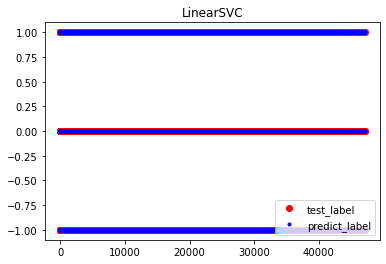

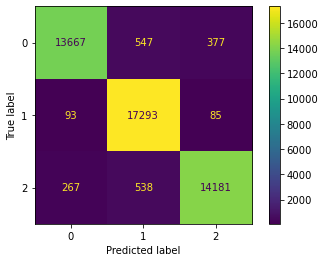

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay, balanced_accuracy_score
target_name=['Negative','Neutral','Positive']
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("LinearSVC")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

train_score = linear_svc.score(tfidf_vec_train, train_data_label.to_numpy().ravel())
test_score =linear_svc.score(tfidf_vec_test, test_data_label.to_numpy().ravel())
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))


# linear SVC chi

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96     14591
     Neutral       0.96      0.99      0.97     17471
    Positive       0.97      0.96      0.96     14986

    accuracy                           0.97     47048
   macro avg       0.97      0.97      0.97     47048
weighted avg       0.97      0.97      0.97     47048

Confusion Matrix: 
 [[13873   359   359]
 [  109 17255   107]
 [  269   342 14375]]
Accuracy Score: 
 0.9671611970753273
Balanced Accuracy Score: 
 0.9658856174179579
Train Accuracy: 0.9713059003570821, Test Accuracy: 0.9671611970753273
CPU times: user 28 s, sys: 44.1 s, total: 1min 12s
Wall time: 23.3 s


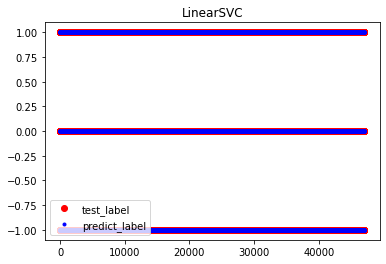

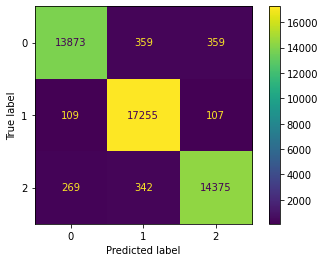

In [ ]:
%%time
from sklearn.feature_selection import SelectKBest, chi2
ch2 = SelectKBest(chi2, k=50000)
linear_svc = Pipeline([
                       ('selector', ch2),
                ('classifier',LinearSVC(C=1.5,dual=False, random_state=42))])

linear_svc.fit(tfidf_vec_train, train_data_label.to_numpy().ravel())
predict_label = linear_svc.predict(tfidf_vec_test)
predict_label=pd.DataFrame(predict_label)

target_name=['Negative','Neutral','Positive']
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("LinearSVC")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

train_score = linear_svc.score(tfidf_vec_train, train_data_label.to_numpy().ravel())
test_score =linear_svc.score(tfidf_vec_test, test_data_label.to_numpy().ravel())
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
train_dense = csr_matrix(tfidf_vec_train)



# SVC_rbf

# DO NOT RUN IT! IT TAKES 6 HOURS.

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.97      0.55      0.70     14591
     Neutral       0.53      0.99      0.70     17471
    Positive       1.00      0.42      0.59     14986

    accuracy                           0.67     47048
   macro avg       0.83      0.65      0.66     47048
weighted avg       0.82      0.67      0.66     47048

Confusion Matrix: 
 [[ 8012  6566    13]
 [   78 17378    15]
 [  148  8580  6258]]
Accuracy Score: 
 0.6726747151844924
Balanced Accuracy Score: 
 0.6537907522066922
CPU times: user 6h 36min 23s, sys: 35 s, total: 6h 36min 58s
Wall time: 6h 34min 52s


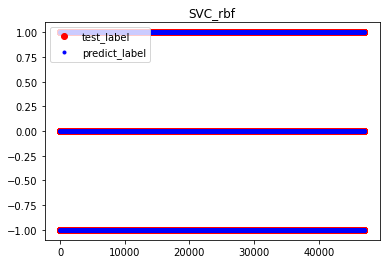

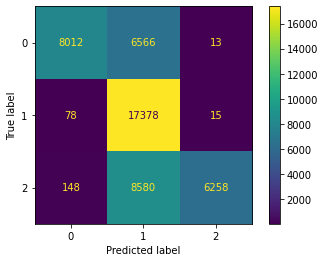

In [ ]:
%%time
from sklearn.svm import SVC

svc = sgd=Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('svc', SVC(C=0.5,  kernel='rbf', degree=3,gamma='auto',decision_function_shape='ovr',random_state=42) )]) 

svc.fit(tfidf_vec_train, train_data_label.to_numpy().ravel())

predict_label = svc.predict(tfidf_vec_test)
predict_label=pd.DataFrame(predict_label)
target_name=['Negative','Neutral','Positive']
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("SVC_rbf")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# SGD

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.98      0.96      0.97     14591
     Neutral       0.97      0.99      0.98     17471
    Positive       0.97      0.97      0.97     14986

    accuracy                           0.97     47048
   macro avg       0.97      0.97      0.97     47048
weighted avg       0.97      0.97      0.97     47048

Confusion Matrix: 
 [[14014   276   301]
 [   85 17279   107]
 [  267   248 14471]]
Accuracy Score: 
 0.9727087230062914
Balanced Accuracy Score: 
 0.9717000091191932
CPU times: user 7.69 s, sys: 1.08 s, total: 8.77 s
Wall time: 7.51 s


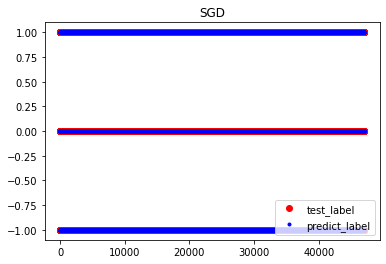

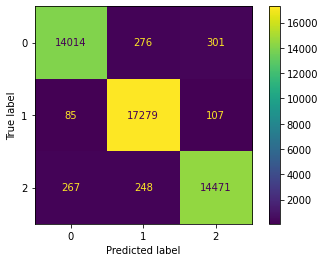

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier

sgd=Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('sgd', SGDClassifier(loss='hinge',penalty='elasticnet',alpha=0.01, l1_ratio=0.15) )]) 
sgd.fit(tfidf_vec_train, train_data_label.to_numpy().ravel())
predict_label = sgd.predict(tfidf_vec_test)
#predict_label=pd.DataFrame(predict_label)
#test_data_label.value_counts()
#predict_label.value_counts()
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("SGD")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# SGD RandomizedSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best parameters set found: 
 {'sgd': SGDClassifier(alpha=0.01, penalty='elasticnet')}
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.98      0.96      0.97     14591
     Neutral       0.97      0.99      0.98     17471
    Positive       0.97      0.97      0.97     14986

    accuracy                           0.97     47048
   macro avg       0.97      0.97      0.97     47048
weighted avg       0.97      0.97      0.97     47048

Confusion Matrix: 
 [[13987   281   323]
 [   85 17269   117]
 [  243   242 14501]]
Accuracy Score: 
 0.9725599387859207
Balanced Accuracy Score: 
 0.9715596876418915


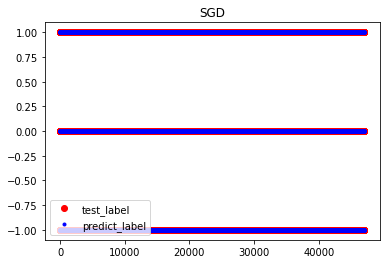

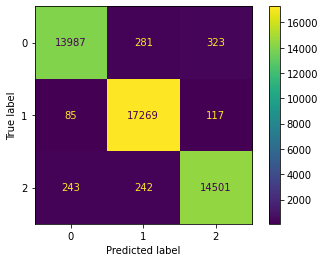

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
        'sgd': [SGDClassifier(loss='hinge',penalty='elasticnet',alpha=0.01, l1_ratio=0.15),SGDClassifier(loss='hinge',penalty='elasticnet',alpha=0.015, l1_ratio=0.15),SGDClassifier(loss='hinge',penalty='elasticnet',alpha=0.02, l1_ratio=0.5)]
        
        }
    

sgd=RandomizedSearchCV(Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('sgd', SGDClassifier(loss='hinge',penalty='elasticnet',alpha=0.01, l1_ratio=0.15) )]) , param_distribs )
sgd.fit(tfidf_vec_train, train_data_label.to_numpy().ravel())
predict_label = sgd.predict(tfidf_vec_test)
#predict_label=pd.DataFrame(predict_label)
#test_data_label.value_counts()
#predict_label.value_counts()
print("Best parameters set found: \n",sgd.best_params_)
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("SGD")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Logistic regression

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.96      0.91      0.94     14591
     Neutral       0.91      0.98      0.94     17471
    Positive       0.96      0.92      0.94     14986

    accuracy                           0.94     47048
   macro avg       0.94      0.94      0.94     47048
weighted avg       0.94      0.94      0.94     47048

Confusion Matrix: 
 [[13291   835   465]
 [  185 17152   134]
 [  341   859 13786]]
Accuracy Score: 
 0.9400824689678626
Balanced Accuracy Score: 
 0.937523472189835
CPU times: user 13.8 s, sys: 18 ms, total: 13.8 s
Wall time: 13.8 s


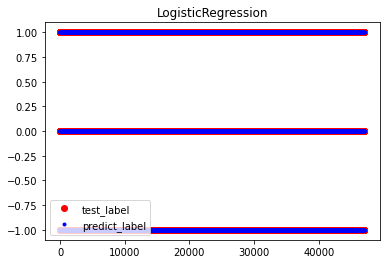

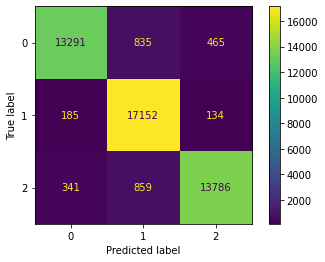

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from scipy.sparse import csr_matrix
train_dense = csr_matrix(tfidf_vec_train)

logreg = OneVsRestClassifier(Pipeline([
                                      
                ('classifier', LogisticRegression(penalty='l2',multi_class='ovr',dual=False,solver = 'sag',class_weight='balanced',C=1.5,random_state=42))]))
logreg.fit(train_dense, train_data_label.to_numpy().ravel())
predict_label = logreg.predict(tfidf_vec_test)
#predict_label=pd.DataFrame(predict_label)
#test_data_label.value_counts()
#predict_label.value_counts()
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("LogisticRegression")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# RandomizedSearchCV + LogisticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs f

Best parameters set found: 
 {'solver': 'lbfgs', 'multi_class': 'multinomial', 'C': 50}
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.97      0.94      0.96     14591
     Neutral       0.95      0.99      0.97     17471
    Positive       0.97      0.96      0.96     14986

    accuracy                           0.96     47048
   macro avg       0.96      0.96      0.96     47048
weighted avg       0.96      0.96      0.96     47048

Confusion Matrix: 
 [[13785   454   352]
 [  133 17220   118]
 [  258   399 14329]]
Accuracy Score: 
 0.9635691208978064
Balanced Accuracy Score: 
 0.9621842952776906
CPU times: user 49min 54s, sys: 44min 37s, total: 1h 34min 32s
Wall time: 38min 38s


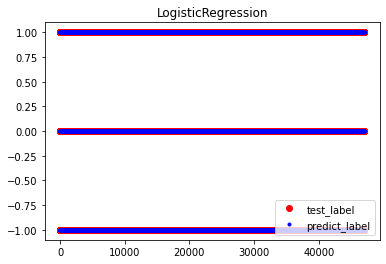

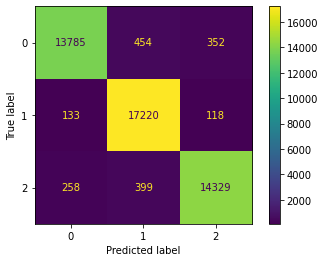

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from scipy.sparse import csr_matrix

param_distribs = [{
        'solver': ['sag'],
        'C':[0.01,0.05,0.1,0.5,1,5,10,50,100],
        'multi_class':['ovr','multinomial']},
    {'solver': ['saga'],
        'C':[0.01,0.05,0.1,0.5,1,5,10,50,100],
    'multi_class':['ovr','multinomial']},
    {'solver': ['lbfgs'],
        'C':[0.01,0.05,0.1,0.5,1,5,10,50,100],
    'multi_class':['ovr','multinomial']}
    ]

train_dense = csr_matrix(tfidf_vec_train)

logreg = RandomizedSearchCV( LogisticRegression(penalty='l2',dual=False,class_weight='balanced',random_state=42), param_distribs )
logreg.fit(train_dense, train_data_label.to_numpy().ravel())
predict_label = logreg.predict(tfidf_vec_test)
#predict_label=pd.DataFrame(predict_label)
#test_data_label.value_counts()
#predict_label.value_counts()
print("Best parameters set found: \n",logreg.best_params_)
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("LogisticRegression")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# KNN

Classification Report: 
               precision    recall  f1-score   support

    Negative       1.00      0.59      0.74     14591
     Neutral       0.56      1.00      0.72     17471
    Positive       1.00      0.49      0.66     14986

    accuracy                           0.71     47048
   macro avg       0.85      0.69      0.71     47048
weighted avg       0.84      0.71      0.71     47048

Confusion Matrix: 
 [[ 8598  5983    10]
 [   19 17438    14]
 [   22  7573  7391]]
Accuracy Score: 
 0.7104871620472709
Balanced Accuracy Score: 
 0.6935240532077503
CPU times: user 2min 43s, sys: 1.44 s, total: 2min 44s
Wall time: 2min 43s


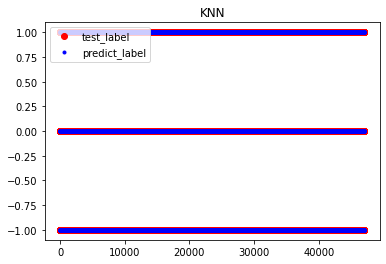

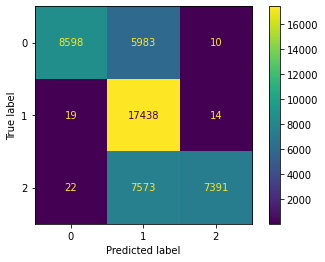

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('knn', KNeighborsClassifier(n_neighbors=3,weights='distance') )]) 

knn.fit(tfidf_vec_train, train_data_label.to_numpy().ravel())
predict_label = knn.predict(tfidf_vec_test)
predict_label=pd.DataFrame(predict_label)
test_data_label.value_counts()
predict_label.value_counts()

print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("KNN")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# KNN with chi2 IMPROVE PERFORMANCE SIGNIFICANTLY

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.94      0.88      0.91     14591
     Neutral       0.86      0.96      0.91     17471
    Positive       0.93      0.86      0.89     14986

    accuracy                           0.90     47048
   macro avg       0.91      0.90      0.90     47048
weighted avg       0.91      0.90      0.90     47048

Confusion Matrix: 
 [[12831  1155   605]
 [  289 16825   357]
 [  578  1522 12886]]
Accuracy Score: 
 0.9042254718585274
Balanced Accuracy Score: 
 0.9007571167821885
CPU times: user 2min 11s, sys: 1.64 s, total: 2min 13s
Wall time: 2min 12s


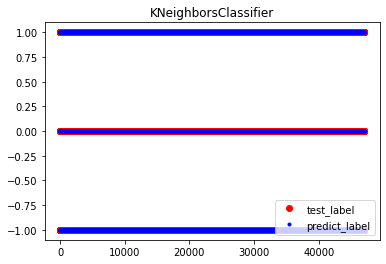

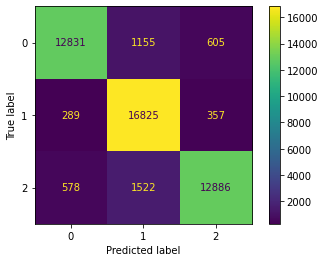

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix
train_dense = csr_matrix(tfidf_vec_train)
ch2 = SelectKBest(chi2, k=50000)
knn=Pipeline([('scale', StandardScaler(with_mean=False) ),
              ('selector', ch2),
                ('knn', KNeighborsClassifier(n_neighbors=3,weights='distance') )]) 
#knn = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')
knn.fit(train_dense, train_data_label.to_numpy().ravel())
predict_label = knn.predict(tfidf_vec_test)
predict_label=pd.DataFrame(predict_label)
test_data_label.value_counts()
predict_label.value_counts()
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("KNeighborsClassifier")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

#train_score = knn.score(tfidf_vec_train, train_data_label.to_numpy().ravel())
#test_score =knn.score(tfidf_vec_test, test_data_label.to_numpy().ravel())
#print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

# KNN with chi2 + RandomizedSearchCV IMPROVE PERFORMANCE SIGNIFICANTLY

Best parameters set found: 
 {'selector': SelectKBest(k=10000, score_func=<function chi2 at 0x7f1ad6b529e0>), 'knn': KNeighborsClassifier(weights='distance')}
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.95      0.89      0.92     14591
     Neutral       0.88      0.98      0.93     17471
    Positive       0.95      0.88      0.92     14986

    accuracy                           0.92     47048
   macro avg       0.93      0.92      0.92     47048
weighted avg       0.92      0.92      0.92     47048

Confusion Matrix: 
 [[12957  1142   492]
 [  179 17155   137]
 [  499  1237 13250]]
Accuracy Score: 
 0.921654480530522
Balanced Accuracy Score: 
 0.9180281969942493
CPU times: user 1h 18min 21s, sys: 37.7 s, total: 1h 18min 58s
Wall time: 1h 18min 17s


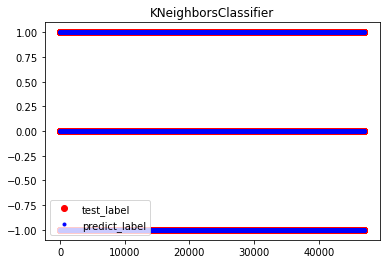

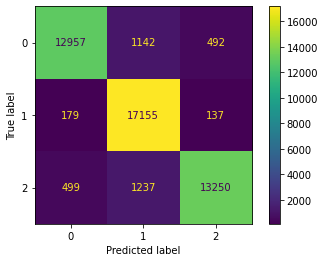

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2 #('scaler', StandardScaler(with_mean=False)), 

from scipy.sparse import csr_matrix
train_dense = csr_matrix(tfidf_vec_train)
ch2 = SelectKBest(chi2, k=50000)
param_distribs = {
        'selector': [SelectKBest(chi2, k=10000),SelectKBest(chi2, k=30000),SelectKBest(chi2, k=50000),SelectKBest(chi2, k=80000),SelectKBest(chi2, k=100000)],
        'knn':[KNeighborsClassifier(n_neighbors=3,weights='distance'),KNeighborsClassifier(n_neighbors=5,weights='distance')]
    }
knn=RandomizedSearchCV(Pipeline([('scale', StandardScaler(with_mean=False) ),
              ('selector', ch2),
                ('knn', KNeighborsClassifier(n_neighbors=3,weights='distance') )]), param_distribs )
#knn = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')
knn.fit(train_dense, train_data_label.to_numpy().ravel())
predict_label = knn.predict(tfidf_vec_test)
predict_label=pd.DataFrame(predict_label)
test_data_label.value_counts()
predict_label.value_counts()
print("Best parameters set found: \n",knn.best_params_)
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("KNeighborsClassifier")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# KNN TEST

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.95      0.89      0.92     14591
     Neutral       0.88      0.98      0.93     17471
    Positive       0.95      0.88      0.92     14986

    accuracy                           0.92     47048
   macro avg       0.93      0.92      0.92     47048
weighted avg       0.92      0.92      0.92     47048

Confusion Matrix: 
 [[12957  1142   492]
 [  179 17155   137]
 [  499  1237 13250]]
Accuracy Score: 
 0.921654480530522
Balanced Accuracy Score: 
 0.9180281969942493
CPU times: user 2min 29s, sys: 791 ms, total: 2min 30s
Wall time: 2min 29s


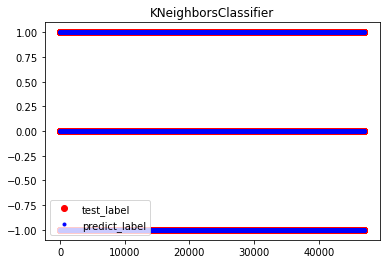

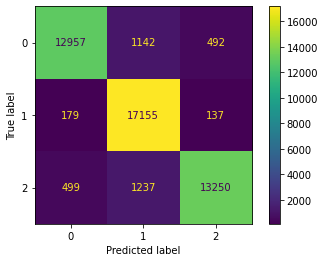

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix
train_dense = csr_matrix(tfidf_vec_train)
ch2 = SelectKBest(chi2, k=10000)
knn=Pipeline([('scale', StandardScaler(with_mean=False) ),
              ('selector', ch2),
                ('knn', KNeighborsClassifier(n_neighbors=5,weights='distance') )]) 
#knn = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')
knn.fit(train_dense, train_data_label.to_numpy().ravel())
predict_label = knn.predict(tfidf_vec_test)
predict_label=pd.DataFrame(predict_label)
test_data_label.value_counts()
predict_label.value_counts()
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("KNeighborsClassifier")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# GaussianNB with TruncatedSVD

cumsum= 0.0020966610000324798
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.31      0.91      0.46     14591
     Neutral       0.32      0.04      0.08     17471
    Positive       0.40      0.05      0.08     14986

    accuracy                           0.31     47048
   macro avg       0.34      0.33      0.21     47048
weighted avg       0.34      0.31      0.20     47048

Confusion Matrix: 
 [[13280   723   588]
 [16280   749   442]
 [13462   844   680]]
Accuracy Score: 
 0.3126381567760585
Balanced Accuracy Score: 
 0.33279893997930515


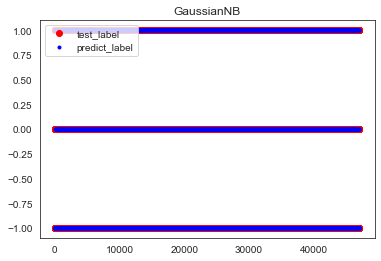

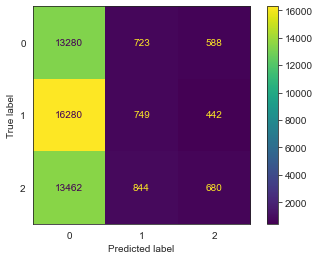

In [249]:
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
train_dense = csr_matrix(tfidf_vec_train)
svd = Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('svd', TruncatedSVD(n_components=100,n_iter=7, random_state=42) )]) 

svd.fit(train_dense)
s = svd.named_steps['svd']
# TODO 2
cumsum = s.explained_variance_ratio_.sum()
# TODO 3
d = np.where(cumsum > 0.8)
print('cumsum=',cumsum)
X_reduced=svd.transform(train_dense)
test_reduced=svd.fit_transform(tfidf_vec_test)

nb = GaussianNB()
nb.fit(X_reduced, train_data_label.to_numpy().ravel())
predict_label = nb.predict(test_reduced)
#predict_label=pd.DataFrame(predict_label)
#test_data_label.value_counts()
#predict_label.value_counts()
print("Classification Report: \n", classification_report(test_data_label, predict_label,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_label))
print("Accuracy Score: \n", accuracy_score(test_data_label, predict_label))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(test_data_label, predict_label))

plt.plot(test_data_label, 'ro',label='test_label')
plt.plot(predict_label, 'b.',label='predict_label')
plt.legend()
plt.title("GaussianNB")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# This is a sparse matrix, thus we can't use PCA.

In [ ]:



pca = Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('pca', PCA() )])


pca.fit(tfidf_vec_train)

p = pca.named_steps['pca']

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

# create data for clustering. It doesn't need train set and test set

In [97]:
data=df_covid_test.loc[:,'corpus']
data_label=df_covid_new['sentiment']
data_label=(data_label.replace({'neg': 0,'neu': 1,'pos': 2 })).values

tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vec_data = tfidf_vec.fit_transform(data)

 ## LDA doesn't work because of computational capacity

In [ ]:
# TODO 1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('lda', LinearDiscriminantAnalysis(n_components=5) )]) 

lda.fit(train_dense.toarray(), train_data_label)

X_lda = lda.transform(train_dense.toarray())
kmeans.fit(X_lda)
print("Classification Report: \n", classification_report(train_data_label, kmeans.labels_,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(train_data_label, kmeans.labels_))
print("Accuracy Score: \n", accuracy_score(train_data_label, kmeans.labels_))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(train_data_label,kmeans.labels_))

MemoryError: Unable to allocate 2.05 TiB for an array with shape (188192, 1496869) and data type float64

# TSNE which takes long time, thus doesn't work. 

In [ ]:
%%time
from sklearn.manifold import TSNE

tsne = Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('tsne', TSNE(n_components=3) )]) 



X_tsne = tsne.fit_transform(tfidf_vec_data)
kmeans.fit(X_tsne)
print("Classification Report: \n", classification_report(data_label, kmeans.labels_,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(data_label, kmeans.labels_))
print("Accuracy Score: \n", accuracy_score(data_label, kmeans.labels_))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(data_label,kmeans.labels_))
plt.plot( data_label, 'ro',label='true_label')
plt.plot( kmeans.labels_, 'b.',label='predict_label')
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


AttributeError: ignored

#  TruncatedSVD with Kmeans

In [242]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [253]:
%%time
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
data_dense = csr_matrix(tfidf_vec_data)
svd = Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('svd', TruncatedSVD(n_components=5,n_iter=5, random_state=42) )]) 

svd.fit(data_dense)
s = svd.named_steps['svd']

CPU times: user 11.4 s, sys: 4.4 s, total: 15.8 s
Wall time: 5.13 s


In [244]:
# TODO 2
cumsum = s.explained_variance_ratio_.sum()
# TODO 3
d = np.where(cumsum > 0.8)
print(cumsum)

0.00010546708236366232


Classification Report: 
               precision    recall  f1-score   support

    Negative       0.31      1.00      0.47     73254
     Neutral       1.00      0.00      0.00     87348
    Positive       0.40      0.00      0.00     74638

    accuracy                           0.31    235240
   macro avg       0.57      0.33      0.16    235240
weighted avg       0.60      0.31      0.15    235240

Confusion Matrix: 
 [[73254     0     0]
 [87344     1     3]
 [74636     0     2]]
Accuracy Score: 
 0.311413875191294
Balanced Accuracy Score: 
 0.33334608148702466


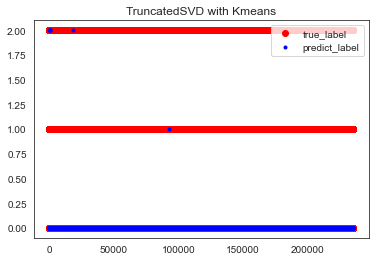

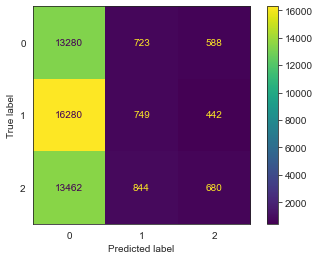

In [254]:
from sklearn.metrics import rand_score,homogeneity_score, completeness_score,silhouette_score
sns.set_style('white')
X_reduced=svd.transform(data_dense)
kmeans.fit(X_reduced)
kemeans=pd.DataFrame(kmeans.labels_)
kemeans.value_counts()
print("Classification Report: \n", classification_report(data_label, kmeans.labels_,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(data_label, kmeans.labels_))
print("Accuracy Score: \n", accuracy_score(data_label, kmeans.labels_))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(data_label,kmeans.labels_))
plt.plot( data_label, 'ro',label='true_label')
plt.plot( kmeans.labels_, 'b.',label='predict_label')
plt.legend()
plt.title("TruncatedSVD with Kmeans")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [246]:

kemeans.value_counts()

0    235234
2         5
1         1
dtype: int64

# Kmeans

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.27      0.00      0.00     73254
     Neutral       0.37      0.99      0.54     87348
    Positive       0.32      0.01      0.02     74638

    accuracy                           0.37    235240
   macro avg       0.32      0.33      0.19    235240
weighted avg       0.32      0.37      0.21    235240

Confusion Matrix: 
 [[  125 72489   640]
 [  187 86390   771]
 [  149 73838   651]]
Accuracy Score: 
 0.37054072436660435
Balanced Accuracy Score: 
 0.3331536221216298
CPU times: user 3min 36s, sys: 6.96 s, total: 3min 43s
Wall time: 32.9 s


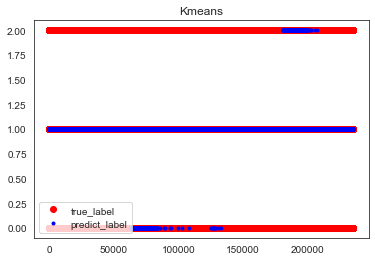

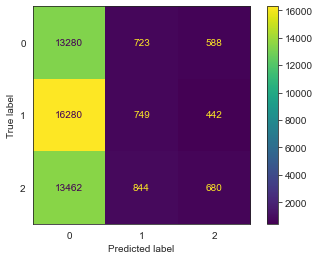

In [255]:
%%time
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(tfidf_vec_data)
print("Classification Report: \n", classification_report(data_label, kmeans.labels_,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(data_label, kmeans.labels_))
print("Accuracy Score: \n", accuracy_score(data_label, kmeans.labels_))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(data_label,kmeans.labels_))
plt.plot( data_label, 'ro',label='true_label')
plt.plot( kmeans.labels_, 'b.',label='predict_label')
plt.legend()
plt.title("Kmeans")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()


# MiniBatchKMeans

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.31      0.06      0.10     73254
     Neutral       0.37      0.92      0.53     87348
    Positive       0.31      0.02      0.04     74638

    accuracy                           0.37    235240
   macro avg       0.33      0.33      0.22    235240
weighted avg       0.33      0.37      0.24    235240

Confusion Matrix: 
 [[ 4299 67418  1537]
 [ 5164 80402  1782]
 [ 4460 68675  1503]]
Accuracy Score: 
 0.3664512837952729
Balanced Accuracy Score: 
 0.3331008047145943
CPU times: user 8.96 s, sys: 454 ms, total: 9.42 s
Wall time: 2.84 s


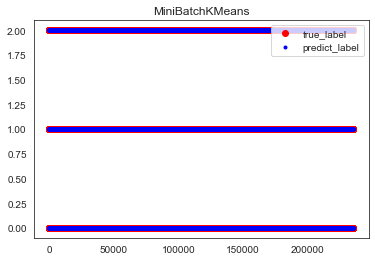

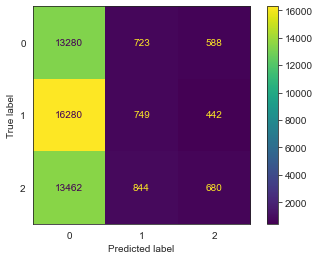

In [256]:
%%time
from sklearn.cluster import MiniBatchKMeans

minikmeans = MiniBatchKMeans(n_clusters=3, random_state=42,batch_size=1024,reassignment_ratio=0.5)
minikmeans.fit(tfidf_vec_data)
print("Classification Report: \n", classification_report(data_label, minikmeans.labels_,target_names=target_name))
print("Confusion Matrix: \n", confusion_matrix(data_label, minikmeans.labels_))
print("Accuracy Score: \n", accuracy_score(data_label, minikmeans.labels_))
print("Balanced Accuracy Score: \n", balanced_accuracy_score(data_label,minikmeans.labels_))
plt.plot( data_label, 'ro',label='true_label')
plt.plot( minikmeans.labels_, 'b.',label='predict_label')
plt.legend()
plt.title("MiniBatchKMeans")
cm = confusion_matrix(test_data_label, predict_label)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Time Series Test

# Text Decomposition Analysis

In [98]:

from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import plotly.graph_objs as go
number_of_components=300

data_dense = csr_matrix(tfidf_vec_data)
svd = Pipeline([('scale', StandardScaler(with_mean=False) ),
                ('svd', TruncatedSVD(n_components=300,n_iter=7, random_state=42) )]) 

svd.fit(data_dense)
s = svd.named_steps['svd']
# TODO 2

# TODO 3


X_reduced=svd.transform(data_dense)

total_variance = s.explained_variance_ratio_.sum()*100

cumsum = np.cumsum(s.explained_variance_ratio_)
print('cumsum=',cumsum)

trace1 = {
    "name": "individual explained variance", 
    "type": "bar", 
    'y':s.explained_variance_ratio_}
trace2 = {
    "name": "cumulative explained variance", 
    "type": "scatter", 
     'y':cumsum}
data = [trace1, trace2]
layout = {
    "xaxis": {"title": "Principal components"}, 
    "yaxis": {"title": "Explained variance ratio"},
  }


cumsum= [2.87014197e-05 5.65937404e-05 8.08453213e-05 1.04824930e-04
 1.28699835e-04 1.52555727e-04 1.76354312e-04 2.00118580e-04
 2.23499871e-04 2.46689988e-04 2.69771470e-04 2.92326078e-04
 3.14532103e-04 3.36692387e-04 3.58812223e-04 3.80649116e-04
 4.01671023e-04 4.22282779e-04 4.42686328e-04 4.63020600e-04
 4.83098384e-04 5.03137417e-04 5.23100704e-04 5.43044643e-04
 5.62905076e-04 5.82558676e-04 6.02114450e-04 6.21584548e-04
 6.41060510e-04 6.60492300e-04 6.79744415e-04 6.98911215e-04
 7.17912750e-04 7.36838370e-04 7.55654679e-04 7.74419533e-04
 7.93101849e-04 8.11749775e-04 8.30310283e-04 8.48798719e-04
 8.67188189e-04 8.85613065e-04 9.03983791e-04 9.22266012e-04
 9.40515181e-04 9.58683764e-04 9.76833113e-04 9.94929970e-04
 1.01293869e-03 1.03094978e-03 1.04887225e-03 1.06675152e-03
 1.08455681e-03 1.10230560e-03 1.12001361e-03 1.13770862e-03
 1.15538480e-03 1.17300845e-03 1.19057438e-03 1.20812427e-03
 1.22554922e-03 1.24303598e-03 1.26048425e-03 1.27793739e-03
 1.29532685e-03 

In [99]:
fig = go.Figure(data=data, layout=layout)
fig.update_layout(     title='{:.2f}% of the Tweet Text Variance Can Be Explained Using {} Words'.format(np.sum(s.explained_variance_ratio_)*100,number_of_components))
fig.show()

# Time Based Analysis

# Time processing

In [205]:
df_covid_sent_lable=df_covid.loc[:,'sentiment']
df_covid_sent_lable=pd.DataFrame((df_covid_sent_lable.replace({'pos': 1, 'neu': 0, 'neg': -1})).values)
df_covid_sent_lable.rename(columns={0: 'sentiment'},inplace=True)
df_covid_sia=pd.concat([df_covid_test, df_covid_sent_lable], axis=1)
df_covid_sia.head()

created_at                                                                                                                                original_text  retweet_count  original_author  hashtags             user_mentions                   place                                                                                              corpus  sentiment
0  Sun Apr 19 21:21:54 +0000 2020  RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…           31.0          RJIshak       NaN  GlblCtzn, priyankachopra  Jakarta Capital Region                             calling leader help protect refugee covid providing quality health care          1
1  Sun Apr 19 21:21:53 +0000 2020                         RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq           61.0   makinwaoluwole       NaN             OGSG_Official                 Nigeria                                              ogun e suppo fo cbn ni sal covid ge ed c edi facili cf          1
2  Sun Apr 19 21:21:52 +0000 2020  RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…            1.0         TembeAmu       NaN             AdvoBarryRoux                     NaN  hese police official based namahadi police station busy drinking liquor certain tavern whilst duty          1
3  Sun Apr 19 21:21:51 +0000 2020                                                              RT @MobilePunch: COVID-19: Oyo discharges two patients\nhttps://t.co/eQRE00ZiJo            0.0       ilyasrabiu       NaN               MobilePunch          Lagos, Nigeria                                                                     covid oyo discharge two patient          0
4  Sun Apr 19 21:21:50 +0000 2020                                                                         My Condolences to the Family of those who did not survive #Covid_19!        13869.0  bucketeconomist  Covid_19                       NaN                     NaN                                                                     condolence family survive covid          0

In [206]:


df_covid_sia = df_covid_sia.sort_values(by='created_at')

df_covid_sia_date=df_covid_sia.copy()
df_covid_sia_date['created_at'] = pd.to_datetime(df_covid_sia['created_at']).dt.date

df_covid_sia_date['year']         = pd.DatetimeIndex(df_covid_sia_date['created_at']).year
df_covid_sia_date['month']        = pd.DatetimeIndex(df_covid_sia_date['created_at']).month
df_covid_sia_date['day']          = pd.DatetimeIndex(df_covid_sia_date['created_at']).day
df_covid_sia_date['day_of_year']  = pd.DatetimeIndex(df_covid_sia_date['created_at']).dayofyear
df_covid_sia_date['quarter']      = pd.DatetimeIndex(df_covid_sia_date['created_at']).quarter
df_covid_sia_date['season']       = df_covid_sia_date.month%12 // 3 + 1
df_covid_sia_date.head()

created_at                                                                                                                                     original_text  retweet_count  original_author hashtags  user_mentions           place                                                                         corpus  sentiment    year  month   day  day_of_year  quarter  season
2687  2020-04-24                                                    Taiwanese inventor of N95 mask returns to work amid COVID-19 pandemic. https://t.co/pnVvcjETLZ            1.0     Taiwan_in_GR      NaN            NaN          greece                       aiwanese inventor n mask return work amid covid pandemic          0  2020.0    4.0  24.0        115.0      2.0     2.0
2686  2020-04-24                                            RT @Kevin_Shipp: Finally, the truth about globalist Bill Gates is coming out.\nhttps://t.co/XexclN0OaN          636.0   Joshua04799878      NaN    Kevin_Shipp             NaN                                       finally truth globalist bill gate coming          1  2020.0    4.0  24.0        115.0      2.0     2.0
2685  2020-04-24            RT @USATODAY: Dozens of sailors on the aircraft carrier who initially tested negative later tested positive. \nhttps://t.co/Ba4BDJTPIi            7.0  VmkellerVanessa      NaN       USATODAY    Florida, USA  dozen sailor aircraft carrier initially tested negative later tested positive          0  2020.0    4.0  24.0        115.0      2.0     2.0
2684  2020-04-24      Celebrating our Class of 2020! While COVID-19 has resulted in the cancellation of the IB DP exams, we want to congr… https://t.co/nx5SMmlmIf          290.0     CISsingapore      NaN            NaN       Singapore            celebrating class covid resulted cancellation ib dp exam want congr         -1  2020.0    4.0  24.0        115.0      2.0     2.0
2683  2020-04-24  RT @CoronaDoubter: Ways in which Covid 19 is different to flu. It will:\n\nmake you unemployed \ndestroy your business\nremove your civil liber…          627.0   SmallStocksJay      NaN  CoronaDoubter  Manchester, UK    way covid different flu make unemployed destroy business remove civil liber         -1  2020.0    4.0  24.0        115.0      2.0     2.0

# Sentiment Scores

In [110]:
%%time
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA #VADER sentimental analysis using sentiment scores
sia=SIA()
positive_score=[]
negative_score=[]
neutral_score=[]
for sentence in df_covid_sia_date.loc[:,'corpus']:
    score=sia.polarity_scores(sentence)
    pos_score=score['pos']
    neu_score=score['neu']
    neg_score=score['neg']
    positive_score.append(pos_score)
    neutral_score.append(neu_score)
    negative_score.append(neg_score)
    
positive_score=pd.DataFrame(positive_score)
positive_score.rename(columns={0: 'positive_score'},inplace=True)
neutral_score=pd.DataFrame(neutral_score)
neutral_score.rename(columns={0: 'neutral_score'},inplace=True)
negative_score=pd.DataFrame(negative_score)
negative_score.rename(columns={0: 'negative_score'},inplace=True)
df_covid_sia_score=pd.concat([df_covid_sia_date, positive_score,neutral_score,negative_score], axis=1)
    


CPU times: user 22.1 s, sys: 88.6 ms, total: 22.2 s
Wall time: 22.2 s


In [111]:
df_covid_sia_score.head()

created_at                                                                                                                                original_text  retweet_count  original_author  hashtags             user_mentions                   place                                                                                              corpus  sentiment    year  month   day  day_of_year  quarter  season  positive_score  neutral_score  negative_score
0  2020-04-19  RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…           31.0          RJIshak       NaN  GlblCtzn, priyankachopra  Jakarta Capital Region                             calling leader help protect refugee covid providing quality health care          1  2020.0    4.0  19.0        110.0      2.0     2.0           0.000          1.000           0.000
1  2020-04-19                         RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq           61.0   makinwaoluwole       NaN             OGSG_Official                 Nigeria                                              ogun e suppo fo cbn ni sal covid ge ed c edi facili cf          1  2020.0    4.0  19.0        110.0      2.0     2.0           0.315          0.685           0.000
2  2020-04-19  RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…            1.0         TembeAmu       NaN             AdvoBarryRoux                     NaN  hese police official based namahadi police station busy drinking liquor certain tavern whilst duty          1  2020.0    4.0  19.0        110.0      2.0     2.0           0.235          0.523           0.242
3  2020-04-19                                                              RT @MobilePunch: COVID-19: Oyo discharges two patients\nhttps://t.co/eQRE00ZiJo            0.0       ilyasrabiu       NaN               MobilePunch          Lagos, Nigeria                                                                     covid oyo discharge two patient          0  2020.0    4.0  19.0        110.0      2.0     2.0           0.385          0.615           0.000
4  2020-04-19                                                                         My Condolences to the Family of those who did not survive #Covid_19!        13869.0  bucketeconomist  Covid_19                       NaN                     NaN                                                                     condolence family survive covid          0  2020.0    4.0  19.0        110.0      2.0     2.0           0.000          0.596           0.404

# sentiment Distrinbution

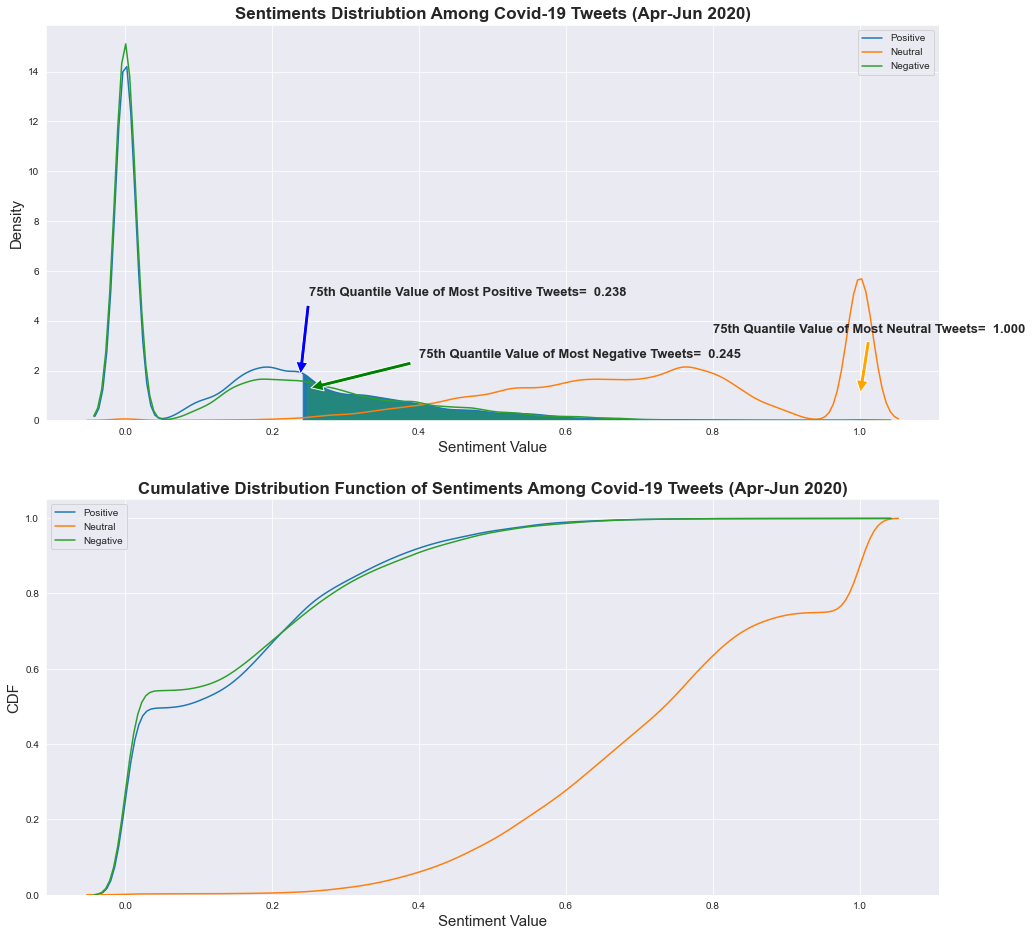

In [212]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(16,16))
pos_extream=df_covid_extreme.loc[:,'positive_score'].quantile(0.75)
neu_extream=df_covid_extreme.loc[:,'neutral_score'].quantile(0.75)
neg_extream=df_covid_extreme.loc[:,'negative_score'].quantile(0.75)
plt.subplot(2,1,1)

ax0 =sns.kdeplot(df_covid_sia_score['positive_score'],label='Positive')
ax1 =sns.kdeplot(df_covid_sia_score['neutral_score'],label='Neutral')
ax2 =sns.kdeplot(df_covid_sia_score['negative_score'],label='Negative')
kde_x0, kde_y0= ax0.lines[0].get_data()
kde_x1, kde_y1 = ax1.lines[0].get_data()
kde_x2, kde_y2 = ax2.lines[0].get_data()
plt.annotate('75th Quantile Value of Most Positive Tweets=  {:.3f}'.format(pos_extream), xy=(pos_extream,1.7), xytext=(0.25, 5),
            arrowprops=dict(facecolor='blue', shrink=0.05),fontsize=13,fontweight='bold')
plt.annotate('75th Quantile Value of Most Neutral Tweets=  {:.3f}'.format(neu_extream), xy=(neu_extream,1), xytext=(0.8, 3.5),
            arrowprops=dict(facecolor='orange', shrink=0.05),fontsize=13,fontweight='bold')
plt.annotate('75th Quantile Value of Most Negative Tweets=  {:.3f}'.format(neg_extream), xy=(neg_extream,1.25), xytext=(0.4, 2.5),
            arrowprops=dict(facecolor='green', shrink=0.05),fontsize=13,fontweight='bold')


plt.title('Sentiments Distriubtion Among Covid-19 Tweets (Apr-Jun 2020)',fontsize=17,fontweight='bold')
plt.xlabel('Sentiment Value',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.legend()
ax0.fill_between(kde_x0, kde_y0, where=(kde_x0>pos_extream) , 
                interpolate=True, color='tab:blue',alpha=1)
ax1.fill_between(kde_x1, kde_y1, where=(kde_x1>neu_extream) , 
                interpolate=True, color='tab:orange',alpha=0.6)
ax2.fill_between(kde_x2, kde_y2, where=(kde_x2>neg_extream) , 
                interpolate=True, color='tab:green',alpha=0.4)

plt.subplot(2,1,2)

sns.kdeplot(df_covid_sia_score['positive_score'],cumulative=True,label='Positive')
sns.kdeplot(df_covid_sia_score['neutral_score'],cumulative=True,label='Neutral')
sns.kdeplot(df_covid_sia_score['negative_score'],cumulative=True,label='Negative')

plt.title('Cumulative Distribution Function of Sentiments Among Covid-19 Tweets (Apr-Jun 2020)',fontsize=17,fontweight='bold')
plt.xlabel('Sentiment Value',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.legend()
plt.show()

# Most means score value greater then quantile 75th
# Using quantile 75th represents extream value

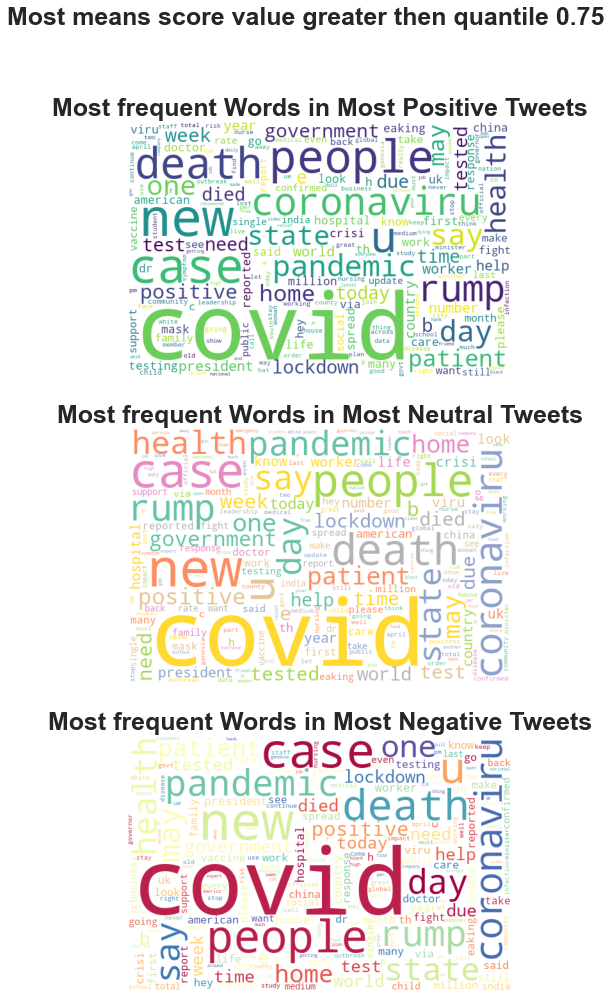

In [147]:
from wordcloud import WordCloud
from matplotlib import colors

want3=['created_at','positive_score','neutral_score','negative_score','sentiment']
df_covid_extreme=df_covid_sia_score.loc[:,want3]
df_covid_extreme=pd.concat([df_covid_extreme, corpus], axis=1)
pos_extream=df_covid_extreme.loc[:,'positive_score'].quantile(0.75)
neu_extream=df_covid_extreme.loc[:,'neutral_score'].quantile(0.75)
neg_extream=df_covid_extreme.loc[:,'negative_score'].quantile(0.75)


Most_Pos = df_covid_extreme[df_covid_extreme['positive_score'].between(pos_extream,1)]
Most_Neu = df_covid_extreme[df_covid_extreme['neutral_score'].between(neu_extream,1)]
Most_Neg = df_covid_extreme[df_covid_extreme['negative_score'].between(neg_extream,1)]

Most_Pos_WORD = ' '.join(Most_Pos.corpus)
Most_Neu_WORD = ' '.join(Most_Neu.corpus)
Most_Neg_WORD = ' '.join(Most_Neg.corpus)

Most_frequent_pos = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Pos_WORD)
Most_frequent_neu = WordCloud(width=600,height=400,collocations = False,background_color='white',colormap='Set2').generate(Most_Neu_WORD)
Most_frequent_neg = WordCloud(width=600,height=400,collocations = False,background_color='white',colormap='Spectral').generate(Most_Neg_WORD)
plt.figure(figsize=(16,16))
plt.subplot(3,1,1)
plt.title('Most frequent Words in Most Positive Tweets',fontsize=25,fontweight='bold')
plt.imshow(Most_frequent_pos)
plt.axis('off')
plt.subplot(3,1,2)
plt.title('Most frequent Words in Most Neutral Tweets',fontsize=25,fontweight='bold')
plt.imshow(Most_frequent_neu)
plt.axis('off')
plt.subplot(3,1,3)
plt.title('Most frequent Words in Most Negative Tweets',fontsize=25,fontweight='bold')
plt.imshow(Most_frequent_neg)
plt.axis('off')
plt.suptitle('Most means score value greater then quantile 0.75',fontsize=25,fontweight='bold')
plt.show()

In [233]:
import datetime
from plotly.subplots import make_subplots
date_mean = df_covid_sia_score.groupby(by='created_at').mean().reset_index()
date_std = df_covid_sia_score.groupby(by='created_at').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=date_mean['created_at'], y=date_mean['positive_score'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=date_mean['created_at'].values[0], y0=date_mean['positive_score'].mean(), x1=date_mean['created_at'].values[-1], y1=date_mean['positive_score'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)

fig.add_annotation(x=date_mean['created_at'].values[1], y=0.14,
            text=r"$\mu : {:.2f}$".format(date_mean['positive_score'].mean()),
            showarrow=None,
            arrowhead=3,
            yshift=10)

fig.add_annotation(x=datetime.datetime(2020,5,19), y=0.182,
            text=r"Potential coronavirus vaccine shows early promise".format(date_mean['positive_score'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10)


fig.add_trace(
    go.Scatter(x=date_mean['created_at'], y=date_mean['negative_score'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=date_mean['created_at'].values[0], y0=date_mean['negative_score'].mean(), x1=date_mean['created_at'].values[-1], y1=date_mean['negative_score'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_annotation(x=date_mean['created_at'].values[1], y=0.134,
            text=r"$\mu : {:.2f}$".format(date_mean['negative_score'].mean()),
            showarrow=None,
            arrowhead=3,
            yshift=10,
            xref='x2', 
            yref='y2')





#fig.add_annotation(x=b_date_mean['created_at'].values[15], y=.024,
 #           text=r"Start Of Incline",
 #           showarrow=True,
 #           arrowhead=6,
 #           yshift=10,
 #           xref='x2', 
 #           yref='y2')

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()

In [235]:
import datetime
date_count = df_covid_sia_score.groupby(by='created_at').count().reset_index()
#date_count = date_count.rename(columns={'id':'Tweets Per Day'})
fig = ex.line(date_count,x='created_at',y='retweet_count')

# fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
#             text=r"Start Of Incline",
#             showarrow=True,
#             arrowhead=6,
#             yshift=10)


fig.add_shape(type="line",
    x0=date_count['created_at'].values[0], y0=date_count['negative_score'].mean(), x1=date_count['created_at'].values[-1], y1=date_count['negative_score'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
)

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


###annots
date_count.date = pd.to_datetime(date_count.created_at)
date_count_dt = date_count.set_index('created_at')

fig.add_annotation(x=datetime.datetime(2020,4,25),y=10300,
            text=r"Trump Suggests that disinfectants could be used to treat coronavirus",
            showarrow=True,
            arrowhead=3,
            yshift=0,ay=-20,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2020,5,4),y=11600,
            text=r"Trump Foresees Virus Death Toll as High as 100,000 in the United States",
            showarrow=True,
            arrowhead=3,
            yshift=-3,ay=190,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2020,5,9),y=10200,
            text=r" Mexico Ignores Wave of Coronavirus Deaths in Capital",
            showarrow=True,
            arrowhead=3,
            yshift=-6,ay=-100,bordercolor="#c7c7c7")
fig.add_annotation(x=datetime.datetime(2020,5,23),y=11670,
            text=r" Fauci calls Moderna vaccine trial results 'quite promising'",
            showarrow=True,
            arrowhead=3,
            yshift=0,ay=-100,bordercolor="#c7c7c7")




fig.update_layout(title='<b>Daily ReTweet Count<b>',width=1200)
fig.show()

/var/folders/fc/6cfsjdw557l498g4_pncl_400000gn/T/ipykernel_11950/668918040.py:28: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

